<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista3_Exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(224, 30)


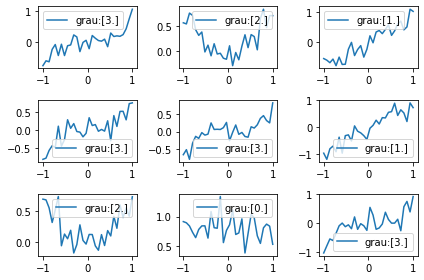

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

#gera o data set com as funções t^0; t^1; t^2; t^3
N_class=4
s_p=30                                             #quantos pontos os dados de entrada tem
s_d=N_class*10                                    #quantos exemplos tem meu Dtrain
s_t=N_class*4                                     #quantos exemplos para teste
p_r = 0.2                                          #porcentagem de ruido 
t=np.linspace(-1,1,s_p)

#dados de treinamento e teste
xtudo = np.empty((0,s_p),float)
ytudo = np.empty((0,1),float)
for q_pol in range(0,N_class):
  matriz_polinomios=(1-p_r)*(np.ones([s_d+s_t,1])*t**q_pol)
  matriz_pol_com_ruido=matriz_polinomios+p_r*np.random.normal(0,1,[s_d+s_t,s_p])
  xtudo = np.append(xtudo, matriz_pol_com_ruido, axis=0)
  matriz_graus = np.ones([s_d+s_t,1])*q_pol
  ytudo = np.append(ytudo, matriz_graus,axis=0)
tudo = np.append(xtudo, ytudo, axis=1)
tudo_misturado=tf.random.shuffle(tudo, seed=None, name=None)
lista_tudo_misturado=np.split(tudo_misturado, [s_p,s_p+1], axis=1)
xdata=lista_tudo_misturado[0]
ydata=lista_tudo_misturado[1]
print(xtudo.shape)

#mostra alguns dados
plt.figure()
for nn in range (0,9):
  plt.subplot(3,3,nn+1)
  plt.plot(t,xdata[nn,:])
  plt.legend(['grau:'+str(ydata[nn])])
plt.tight_layout()

#salva o dataset
with h5py.File('poli_data_set.h5','w') as hf:
   hf.create_dataset("tempo", data=t)
   hf.create_dataset("xdata", data=xdata)
   hf.create_dataset("ydata", data=ydata)
   hf.create_dataset("data_info", data=[s_p,s_d,s_t,N_class])